# IAA Laboratori 9 - Model Cards

## Background
This notebook demonstrates how to generate a model card using the Model Card Toolkit with a scikit-learn model in a Jupyter/Colab environment. You can learn more about model cards at [https://modelcards.withgoogle.com/about](https://modelcards.withgoogle.com/about).

- [EU AI Act: first regulation on artificial intelligence](https://www.europarl.europa.eu/news/en/headlines/society/20230601STO93804/eu-ai-act-first-regulation-on-artificial-intelligence)
- [Model Card Regulatory Check](https://oecd.ai/en/catalogue/tools/model-card-regulatory-check)

## Setup
We first need to install and import the necessary packages.

### Upgrade Pip and Install Packages

In [1]:
## If the next line does not work, 
%pip install model-card-toolkit

##
## try to install the model-card-toolkit from the github repo
##

#%git clone https://github.com/tensorflow/model-card-toolkit.git
#%cd model-card-toolkit
#%python setup.py sdist bdist_wheel
#%pip install --upgrade ./dist/model_card_toolkit-*.whl

^C
Note: you may need to restart the kernel to use updated packages.


  Using cached model_card_toolkit-2.0.0-py3-none-any.whl (68 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached jsonschema-3.2.0-py2.py3-none-any.whl (56 kB)
  Using cached tensorflow_data_validation-1.14.0-cp310-cp310-win_amd64.whl.metadata (18 kB)
  Using cached tensorflow_model_analysis-0.41.1-py3-none-any.whl (1.8 MB)
  Using cached tensorflow_metadata-1.14.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached ml_metadata-1.14.0-cp310-cp310-win_amd64.whl.metadata (5.1 kB)
  Using cached pyrsistent-0.20.0-cp310-cp310-win_amd64.whl.metadata (976 bytes)
  Using cached attrs-21.4.0-py2.py3-none-any.whl (60 kB)
  Using cached grpcio-1.59.3-cp310-cp310-win_amd64.whl.metadata (4.2 kB)
  Using cached protobuf-3.20.3-cp310-cp310-win_amd64.whl (904 kB)
  Using cached apache_beam-2.52.0-cp310-cp310-win_amd64.whl.metadata (6.4 kB)
  Using cached pandas-1.5.3-cp310-cp310-win_amd64.whl (10.4 MB)
  Using cached pyarrow-10.0.1-cp310-cp310-win_amd64.whl (20.2 MB)
  Using cached

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [17 lines of output]
      Traceback (most recent call last):
        File "C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
        File "C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
         

### Import packages

We import necessary packages, including scikit-learn.

In [2]:
from datetime import date
from io import BytesIO
from IPython import display
import model_card_toolkit as mct
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

import base64
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import uuid

## Load data

This example uses the Breast Cancer Wisconsin Diagnostic dataset that scikit-learn can load using the [load_breast_cancer()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) function.

In [3]:
cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
78,20.180,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,0.08142,...,23.37,31.72,170.30,1623.0,0.1639,0.61640,0.76810,0.2508,0.5440,0.09964
41,10.950,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,0.06870,...,12.84,35.34,87.22,514.0,0.1909,0.26980,0.40230,0.1424,0.2964,0.09606
550,10.860,21.48,68.51,360.5,0.07431,0.04227,0.00000,0.00000,0.1661,0.05948,...,11.66,24.77,74.08,412.3,0.1001,0.07348,0.00000,0.0000,0.2458,0.06592
504,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,0.2378,0.09502,...,10.28,16.38,69.05,300.2,0.1902,0.34410,0.20990,0.1025,0.3038,0.12520
281,11.740,14.02,74.24,427.3,0.07813,0.04340,0.02245,0.02763,0.2101,0.06113,...,13.31,18.26,84.70,533.7,0.1036,0.08500,0.06735,0.0829,0.3101,0.06688


In [5]:
y_train.head()

78     0
41     0
550    1
504    1
281    1
dtype: int64

## Plot data

We will create several plots from the data that we will include in the model card.

In [6]:
# Utility function that will export a plot to a base-64 encoded string that the model card will accept.

def plot_to_str():
    img = BytesIO()
    plt.savefig(img, format='png')
    return base64.encodebytes(img.getvalue()).decode('utf-8')

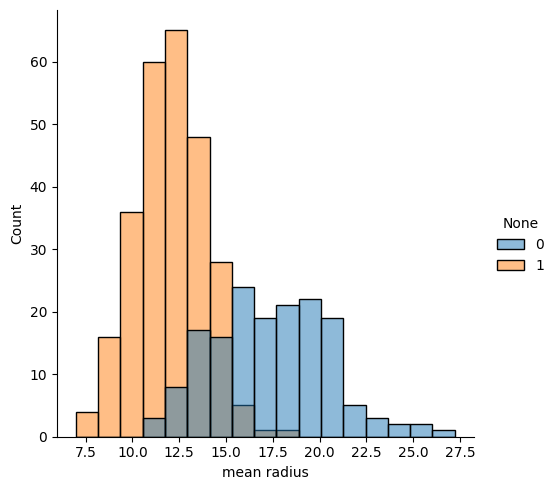

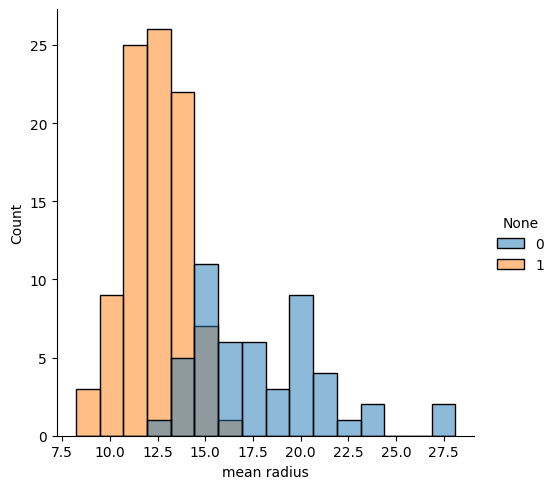

In [7]:
# Plot the mean radius feature for both the train and test sets

sns.displot(x=X_train['mean radius'], hue=y_train)
mean_radius_train = plot_to_str()

sns.displot(x=X_test['mean radius'], hue=y_test)
mean_radius_test = plot_to_str()

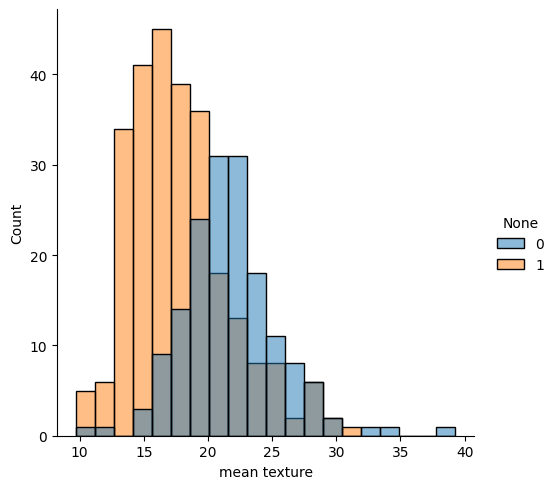

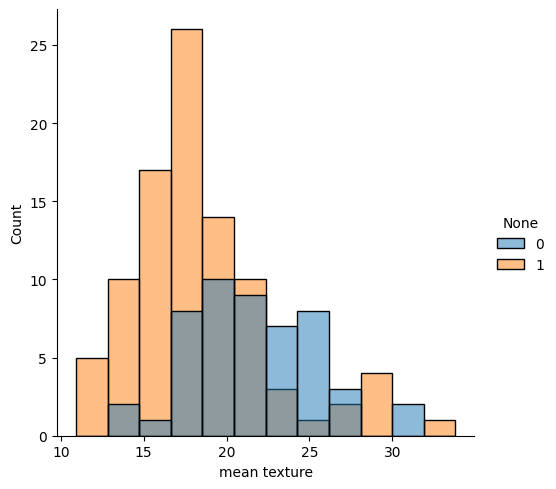

In [8]:
# Plot the mean texture feature for both the train and test sets

sns.displot(x=X_train['mean texture'], hue=y_train)
mean_texture_train = plot_to_str()

sns.displot(x=X_test['mean texture'], hue=y_test)
mean_texture_test = plot_to_str()

## Train model

In [9]:
# Create a classifier and fit the training data

clf = KNeighborsClassifier(n_neighbors=10,
                            p=2,
                            metric='minkowski').fit(X_train, y_train)

## Evaluate model

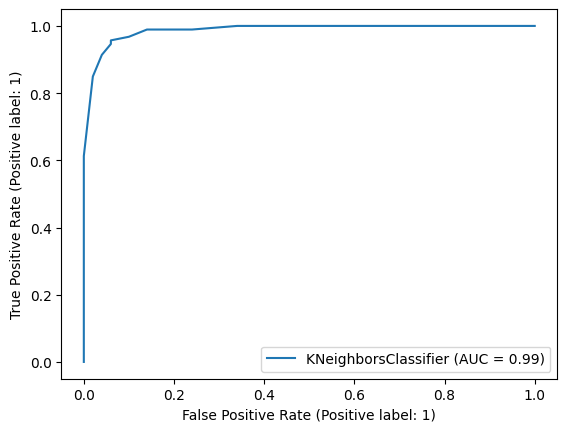

In [10]:
# Plot a ROC curve

RocCurveDisplay.from_estimator(clf, X_test, y_test)
roc_curve = plot_to_str()

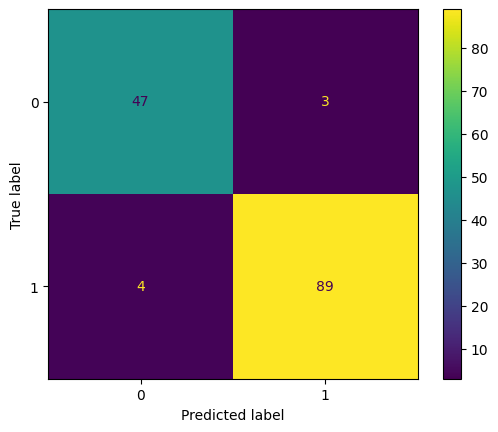

In [11]:
# Plot a confusion matrix

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
confusion_matrix = plot_to_str()

## Create a model card

### Initialize toolkit and model card

In [12]:
toolkit = mct.ModelCardToolkit()

model_card = toolkit.scaffold_assets()

### Annotate information into model card

Check model card schema: https://github.com/tensorflow/model-card-toolkit/blob/main/model_card_toolkit/schema/v0.0.1/model_card.schema.json


In [13]:
model_card.model_details.name = 'Breast Cancer Wisconsin (Diagnostic) Dataset'
model_card.model_details.overview = (
    'Aquest model prediu si el càncer de pit es benigne o dolent basantse en mesures d\'imatge.'
    'Aquest model està entrenat amb un algorisme de KNN. És un algorisme paràmetric i que'
'es basa en la distancia de minkowski als 5 veins més propers per assignar mostres. Els '
'hiperparàmetres que s\'han hagut de controlar són: el numero de veins=10, p=2, i la mètrica'
)
model_card.model_details.owners = [
    mct.Owner(name= 'Jordi Luque (IAA Professors)', contact='jordi.luque.serrano@upc.edu')
]
model_card.model_details.references = [
    mct.Reference(reference='https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)'),
    mct.Reference(reference='https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf'),
    mct.Reference(reference='https://scikit-learn.org/stable/'),
]
model_card.model_details.version.name = str(uuid.uuid4())
model_card.model_details.version.date = str(date.today())

model_card.considerations.ethical_considerations = [mct.Risk(
    name=('La selecció manual de seccions d\'imatge per digitalitzar pot crear un'
            'selection bias'),
    mitigation_strategy='Automatitzar la selecció de seccions d\'imatge per digitalitzar'
)]
model_card.considerations.limitations = [mct.Limitation(description='Breast cancer diagnosis --> '
                                        '"What are the known technical limitations of the model?'
                                        'E.g. What kind(s) of data should the model be expected not to perform well on?'
                                        'What are the factors that might degrade model performance?'
                                                        )]
model_card.considerations.use_cases = [mct.UseCase(description='L\'intenció d\'ús d\'aquest model és el de treballar els model cards'
'mitjançant una tasca d\'aprenentatge supervisat en el qual es pretèn classificar tumors'
'en els seus respectius estats. Aquest model no té cap intenció en ser usat per a'
'realitzar cap diagnostic real o negoci. L\'usuari que ha de fer'
'servir aquest model és el propi estudiant.')]
model_card.considerations.users = [mct.User(description='Estudiants de IAA'), mct.User(description='Professors de IAA')]

model_card.model_parameters.data.append(mct.Dataset())
model_card.model_parameters.data[0].graphics.description = (
  f'{len(X_train)} rows with {len(X_train.columns)} features')
model_card.model_parameters.data[0].graphics.collection = [
    mct.Graphic(image=mean_radius_train),
    mct.Graphic(image=mean_texture_train)
]
model_card.model_parameters.data.append(mct.Dataset())
model_card.model_parameters.data[1].graphics.description = (
  f'{len(X_test)} rows with {len(X_test.columns)} features')
model_card.model_parameters.data[1].graphics.collection = [
    mct.Graphic(image=mean_radius_test),
    mct.Graphic(image=mean_texture_test)
]
model_card.quantitative_analysis.graphics.description = (
  'ROC curve and confusion matrix')
model_card.quantitative_analysis.graphics.collection = [
    mct.Graphic(image=roc_curve),
    mct.Graphic(image=confusion_matrix)
]

toolkit.update_model_card(model_card)

## Generate model card

In [14]:
# Return the model card document as an HTML page

html = toolkit.export_format()

display.display(display.HTML(html))